In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib as plt

In [5]:
# Read data

data = pd.read_csv("..\\Raw_Data\\CommViolPredUnnormalizedData.txt", sep='\s*,\s*',encoding='latin-1',engine='python',na_values=["?"]) # Ensure that unknown values are set to NA

data.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack',
           'racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up',
           'numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst',
           'pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap',
           'HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed',
           'PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce',
           'MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par',
           'PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig',
           'PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5',
           'PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam',
           'PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup',
           'PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded',
           'PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal',
           'OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc',
           'MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState',
           'PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps',
           'LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop',
           'RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor',
           'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans',
           'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn',
           'PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults',
           'assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons',
           'arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']

In [8]:
## For the few columns where there are only small amounts of NA values, just delete these rows

df = data[data['ViolentCrimesPerPop'].notna()]

array([[<AxesSubplot:title={'center':'ViolentCrimesPerPop'}>]],
      dtype=object)

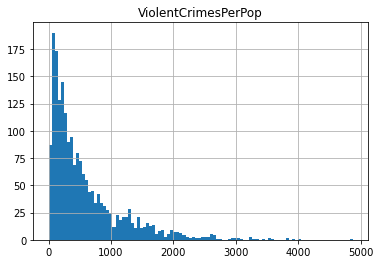

In [10]:
df.hist(column='ViolentCrimesPerPop', bins = 100) #quick look at the data

In [11]:
#Creating a new column for high crimes
def high_crime(row):
    if row['ViolentCrimesPerPop'] > 3000:
        return 1
    elif row['ViolentCrimesPerPop'] < 3000:
        return 0
    
    
df['HighCrime'] = df.apply(high_crime, axis = 1)

<ipython-input-11-6acb9dc2fd01>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HighCrime'] = df.apply(high_crime, axis = 1)


In [61]:
df.describe()

,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,HighCrime
count,819.000000,816.000000,1993.000000,1.993000e+03,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1990.000000,1991.000000,1991.000000,1990.000000,1990.000000,1906.000000,1906.000000,1993.000000,1901.000000,1993.000000
mean,58.851038,46238.420343,5.513798,5.227164e+04,2.706613,9.513778,83.485058,2.748906,8.484922,14.432198,...,1054.678281,2117.818182,3379.939764,503.938693,478.889377,30.534627,32.121175,589.353914,4944.190084,0.008530
std,126.495909,25274.684404,2.881867,2.021962e+05,0.343129,14.104338,16.396668,4.648607,15.211885,4.479479,...,773.527258,7355.069727,1941.247371,3196.484928,503.737545,180.663391,39.623065,614.816135,2786.155494,0.091986
min,1.000000,70.000000,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,...,16.920000,10.000000,77.860000,1.000000,6.550000,0.000000,0.000000,0.000000,116.790000,0.000000
25%,9.000000,25100.250000,3.000000,1.436300e+04,2.490000,0.940000,75.880000,0.610000,0.920000,12.230000,...,520.897500,387.000000,2013.320000,30.000000,159.322500,1.000000,7.252500,161.730000,2913.400000,0.000000
50%,23.000000,48167.000000,5.000000,2.268600e+04,2.650000,3.160000,89.600000,1.240000,2.350000,13.620000,...,854.965000,745.000000,3077.530000,75.500000,308.320000,5.000000,21.045000,374.070000,4480.210000,0.000000
75%,60.000000,66670.000000,8.000000,4.318400e+04,2.850000,11.970000,95.990000,2.730000,8.610000,15.390000,...,1375.360000,1688.500000,4365.115000,238.000000,600.282500,16.000000,43.280000,794.410000,6273.780000,0.000000
max,840.000000,94597.000000,10.000000,7.322564e+06,5.280000,96.670000,99.630000,57.460000,95.290000,54.400000,...,11881.020000,235132.000000,25910.550000,112464.000000,4968.590000,5119.000000,436.370000,4877.060000,27119.760000,1.000000


In [12]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df.isnull().sum()

communityname               0
state                       0
countyCode               1174
communityCode            1177
fold                        0
population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
NumUnderPov                 0
PctPopUnde

In [13]:
pd.set_option("display.max_rows", 200, "display.max_columns", 20)

columns_to_drop = ['communityCode', 'countyCode', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop',
                   'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite',
                  'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                  'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop', 'arsons', 'arsonsPerPop',
                  'nonViolPerPop', 'PctPolicMinor']
df = df.drop(columns_to_drop, axis=1)
df

,communityname,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,ViolentCrimesPerPop,HighCrime
0,Marpletownship,PA,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,...,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,127.56,0
1,Tigardcity,OR,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,...,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,218.59,0
2,Gloversvillecity,NY,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,...,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,306.64,0
4,Springfieldcity,MO,1,140494,2.45,2.51,95.65,0.90,0.95,18.09,...,449.0,297.29,2094.0,1386.46,7690.0,5091.64,454.0,300.60,442.95,0
5,Norwoodtown,MA,1,28700,2.60,1.60,96.57,1.47,1.10,11.17,...,54.0,182.66,110.0,372.09,288.0,974.19,144.0,487.10,226.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,Mercedcity,CA,10,56216,3.07,6.87,61.68,15.23,29.86,15.46,...,170.0,280.29,1376.0,2268.72,2563.0,4225.82,489.0,806.25,545.75,0
2210,Pinevillecity,LA,10,12251,2.68,21.18,76.65,1.52,1.29,17.36,...,10.0,82.73,104.0,860.43,574.0,4748.90,24.0,198.56,124.10,0
2211,Yucaipacity,CA,10,32824,2.46,0.52,92.62,0.98,11.00,11.81,...,96.0,261.29,628.0,1709.26,895.0,2435.97,179.0,487.19,353.83,0
2212,Beevillecity,TX,10,13547,2.89,3.37,69.91,0.90,62.11,17.16,...,79.0,620.48,192.0,1508.01,474.0,3722.90,13.0,102.10,691.17,0


In [101]:
df.isnull().sum()

communityname            0
state                    0
fold                     0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              1
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
P

In [15]:
df = df[df['autoTheftPerPop'].notna()]
df = df[df['autoTheft'].notna()]
df = df[df['larcPerPop'].notna()]
df = df[df['larcenies'].notna()]
df = df[df['burglPerPop'].notna()]
df = df[df['burglaries'].notna()]
df = df[df['OtherPerCap'].notna()]

,communityname,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,ViolentCrimesPerPop,HighCrime
0,Marpletownship,PA,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,...,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,127.56,0
1,Tigardcity,OR,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,...,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,218.59,0
2,Gloversvillecity,NY,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,...,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,306.64,0
4,Springfieldcity,MO,1,140494,2.45,2.51,95.65,0.90,0.95,18.09,...,449.0,297.29,2094.0,1386.46,7690.0,5091.64,454.0,300.60,442.95,0
5,Norwoodtown,MA,1,28700,2.60,1.60,96.57,1.47,1.10,11.17,...,54.0,182.66,110.0,372.09,288.0,974.19,144.0,487.10,226.63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,Mercedcity,CA,10,56216,3.07,6.87,61.68,15.23,29.86,15.46,...,170.0,280.29,1376.0,2268.72,2563.0,4225.82,489.0,806.25,545.75,0
2210,Pinevillecity,LA,10,12251,2.68,21.18,76.65,1.52,1.29,17.36,...,10.0,82.73,104.0,860.43,574.0,4748.90,24.0,198.56,124.10,0
2211,Yucaipacity,CA,10,32824,2.46,0.52,92.62,0.98,11.00,11.81,...,96.0,261.29,628.0,1709.26,895.0,2435.97,179.0,487.19,353.83,0
2212,Beevillecity,TX,10,13547,2.89,3.37,69.91,0.90,62.11,17.16,...,79.0,620.48,192.0,1508.01,474.0,3722.90,13.0,102.10,691.17,0


In [16]:
df.isnull().sum()

communityname            0
state                    0
fold                     0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              0
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
P